# _`expression`_.`derivation(`_`label`_`, `_`breaking`_`=False)`

Compute the derivation of a weighted expression.

Arguments:
- `label`: the (non empty) string to derive the expression with.
- `breaking`: whether to split the result.

See also:
- [_expression_.derived_term](expression.derived_term.ipynb)
- [_expression_.expansion](expression.expansion.ipynb)
- [_polynomial_.split](polynomial.split.ipynb)

References:
- [lombardy.2005.tcs](References.ipynb#lombardy.2005.tcs) defines the derivation
- [angrand.2010.jalc](References.ipynb#angrand.2010.jalc) defines the breaking derivation

## Examples

The following function will prove handy: it takes a rational expression and a list of strings, and returns a $\LaTeX$ `aligned` environment to display nicely the result.

In [1]:
import vcsn
from IPython.display import Latex

def diffs(r, ss):
    eqs = []
    for s in ss:
        eqs.append(r'\frac{{\partial}}{{\partial {0}}} {1}& = {2}'
                   .format(s,
                           r.format('latex'),
                           r.derivation(s).format('latex')))
    return Latex(r'''\begin{{aligned}}
        {0}
    \end{{aligned}}'''.format(r'\\'.join(eqs)))

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

### Classical expressions

In the classical case (labels are letters, and weights are Boolean), this is the construct as described by Antimirov.

In [2]:
b = vcsn.context('lal_char(ab), b')
r = b.expression('[ab]{3}')
r.derivation('a')

(a+b)(a+b)

Or, using the `diffs` function we defined above:

In [3]:
diffs(r, ['a', 'aa', 'aaa', 'aaaa'])

<IPython.core.display.Latex object>

### Weighted Expressions

Of course, expressions can be weighted.

In [4]:
q = vcsn.context('lal_char(abc), q')
r = q.expression('(<1/6>a*+<1/3>b*)*')
diffs(r, ['a', 'aa', 'ab', 'b', 'ba', 'bb'])

<IPython.core.display.Latex object>

And this is tightly connected with the construction of the derived-term automaton.

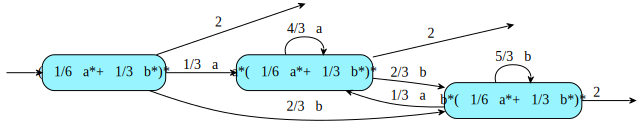

In [5]:
r.derived_term()

### Breaking derivation

The "breaking" derivation "splits" the polynomial at the end.

In [6]:
r = q.expression('[ab](<2>[ab])')
r.derivation('a')

<2>(a+b)

In [7]:
r.derivation('a', True)

<2>a + <2>b

In [8]:
r.derivation('a').split()

<2>a + <2>b

Again, this is tightly connected with both flavors of the derived-term automaton.

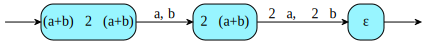

In [9]:
r.derived_term()

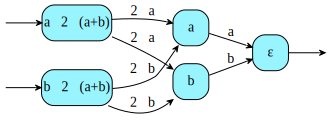

In [10]:
r.derived_term('breaking_derivation')